In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
df_registered = pd.read_csv('registrado.csv')
df_registered.set_index('Registrado (mil ton.)', inplace=True)
df_registered = df_registered.T
df_registered

Registrado (mil ton.),Acre,Alagoas,Amapá,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goiais,Maranhão,...,Piauí,Rio Grande do Sul,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Santa Catarina,São Paulo,Sergipe,Tocantins
2017-07,13.552,21.340,12.399,64.862,250.101,179.243,53.235,86.678,205.551,88.780,...,75.913,244.680,185.846,48.750,36.094,7.703,265.999,910.653,36.174,45.710
2017-08,15.826,26.848,11.268,49.885,277.528,194.134,59.290,100.174,230.558,86.195,...,74.774,252.183,200.671,59.738,42.556,8.956,277.169,937.696,38.394,45.564
2017-09,14.869,28.074,8.741,53.130,270.092,186.948,54.875,89.777,209.621,84.121,...,72.484,249.403,207.913,60.303,41.193,8.626,245.824,871.611,35.688,43.754
2017-10,14.734,29.941,12.358,57.796,278.146,194.907,57.520,94.810,210.984,88.187,...,71.534,208.299,188.107,51.009,37.053,6.735,244.227,795.853,42.076,48.554
2017-11,12.754,28.977,11.876,47.026,257.458,179.505,49.573,93.446,189.889,79.514,...,70.320,238.414,193.661,48.874,33.527,9.161,263.751,804.767,39.875,40.896
2017-12,11.925,31.580,11.713,74.919,231.748,173.278,40.698,87.540,143.721,74.061,...,67.364,213.179,175.783,48.506,25.616,8.634,211.136,712.733,38.984,35.255
2018-01,13.114,29.991,11.449,34.733,268.336,160.261,47.195,96.706,176.275,64.818,...,59.688,221.534,185.078,42.721,25.221,7.115,219.002,763.665,41.652,34.018
2018-02,8.920,26.820,7.805,15.022,223.453,113.987,43.527,74.086,152.632,44.254,...,40.259,212.139,146.761,32.801,23.321,2.781,234.275,727.397,33.904,22.422
2018-03,9.724,29.446,7.726,20.879,241.464,114.289,45.488,92.676,177.876,52.169,...,41.239,228.994,173.121,37.638,23.927,7.490,249.920,855.245,29.447,29.555
2018-04,9.737,27.666,8.516,36.409,238.901,117.313,44.960,82.865,181.384,53.399,...,45.035,226.827,169.841,37.358,24.561,7.043,246.326,855.042,29.197,28.919


In [27]:
df_previsto = pd.read_csv('previsto.csv')
df_previsto.set_index('Previsto (mil ton.)', inplace=True)
df_previsto = df_previsto.T
df_previsto

Previsto (mil ton.),Acre,Alagoas,Amapá,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goiais,Maranhão,...,Piauí,Rio Grande do Sul,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Santa Catarina,São Paulo,Sergipe,Tocantins
2017-07,12.136589,29.192987,12.110310,49.457176,267.058441,188.367798,50.753025,90.097031,216.317398,77.367760,...,57.945511,245.002136,200.735779,54.907639,31.628561,8.312605,232.957932,774.674622,35.997047,47.038055
2017-08,12.133156,29.101618,12.341373,48.840664,273.053833,199.365326,53.287395,91.698685,214.529968,72.292435,...,57.945511,252.806183,201.710846,54.692390,31.757408,8.287465,233.380447,866.304626,34.984089,47.539047
2017-09,12.129940,28.988585,12.427139,48.957462,270.918243,193.286331,52.241547,90.463211,212.359955,71.348114,...,57.945511,216.764572,197.939194,54.470581,31.662781,8.265255,233.231964,762.035889,34.445477,45.956646
2017-10,12.125576,28.911938,12.322193,48.451351,271.359009,188.708542,51.137512,91.531654,208.933105,69.991028,...,57.945503,250.687439,193.474854,53.594666,31.751755,8.244525,233.491714,755.123901,34.161217,42.774147
2017-11,12.121902,28.933973,12.077255,48.217655,261.444244,185.455429,54.092079,92.764458,194.046188,67.287567,...,57.945511,248.135452,190.504532,52.000385,31.722603,8.225656,233.561569,768.937622,33.975380,39.100403
2017-12,12.117725,32.034889,11.851500,47.785603,259.408020,158.124039,45.927380,93.437843,189.372314,54.763958,...,57.945511,207.369720,189.143585,50.846516,31.732782,8.208827,233.549438,821.974854,33.824486,36.265812
2018-01,12.115011,28.596607,11.517047,46.945507,259.603485,148.231339,43.279797,95.546097,187.169830,54.943966,...,57.945511,205.961975,188.547684,50.194813,31.795221,8.194432,233.599838,853.742493,33.702152,34.803318
2018-02,12.112654,27.429358,10.919878,45.608036,254.806015,148.231491,38.696941,95.039948,183.547394,54.518528,...,57.945511,205.557220,188.272736,49.552071,31.925695,8.184393,233.863205,846.420776,33.651733,34.684010
2018-03,12.112032,27.435108,10.551701,44.997707,261.128296,148.233597,46.339031,92.532639,186.269287,60.270935,...,57.945511,233.920547,188.212051,49.315979,31.891462,8.177803,233.978394,786.781982,33.607346,35.366589
2018-04,12.112887,27.755234,10.490733,44.768341,256.931427,148.233353,40.031670,91.429008,191.702087,61.524338,...,57.945511,207.396820,188.360718,49.181236,31.897284,8.173414,233.998535,860.490540,33.553478,36.935299


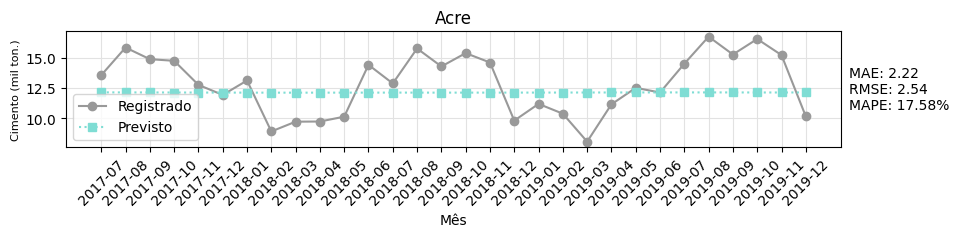

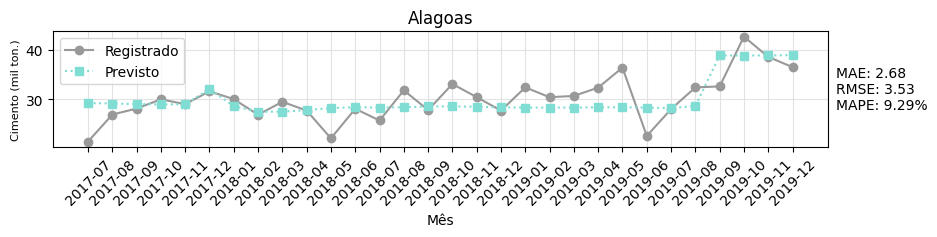

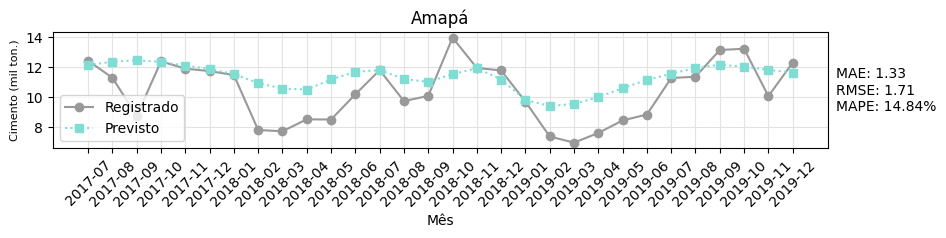

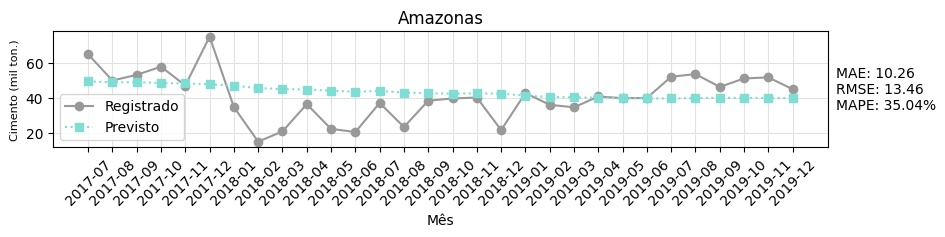

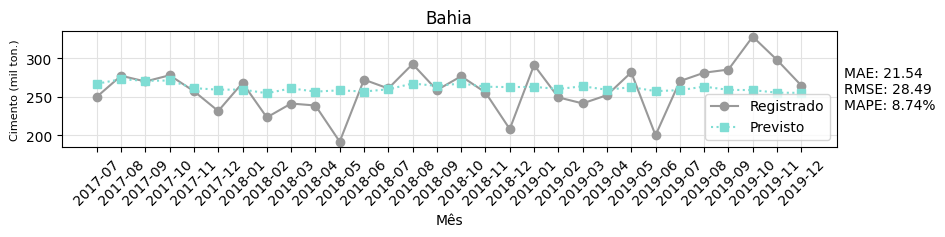

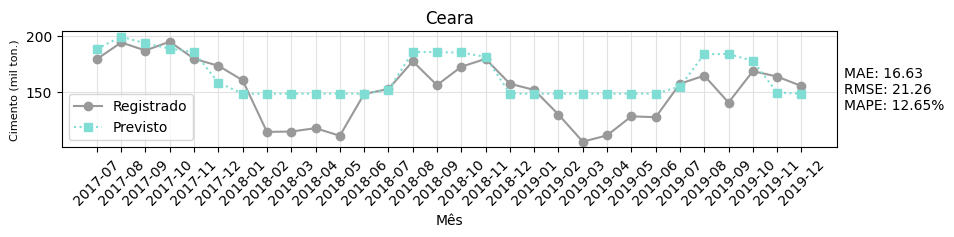

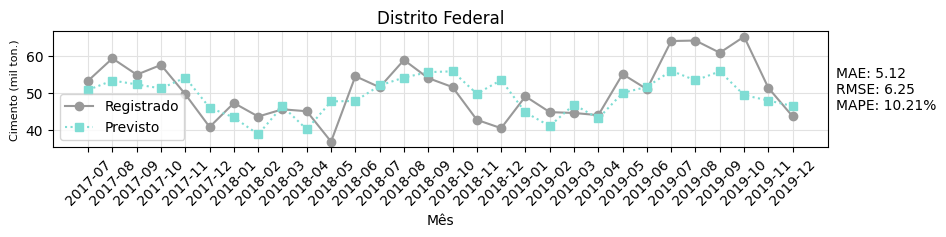

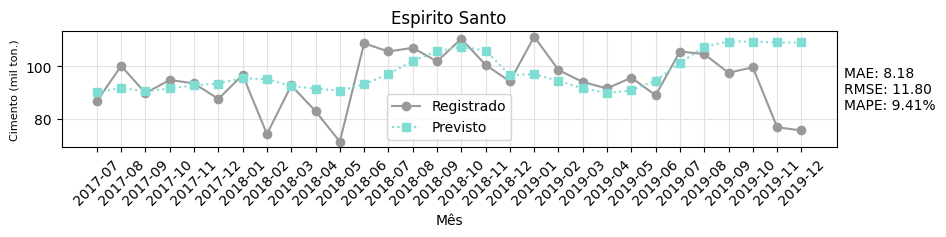

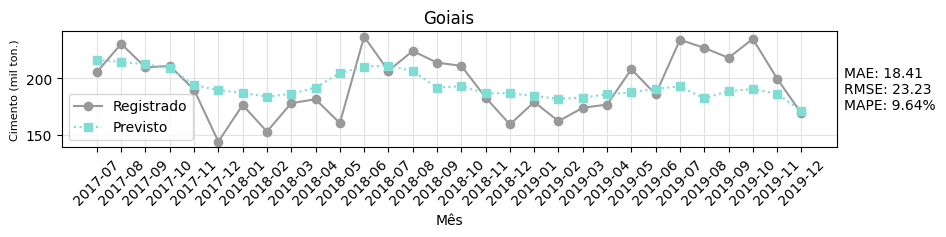

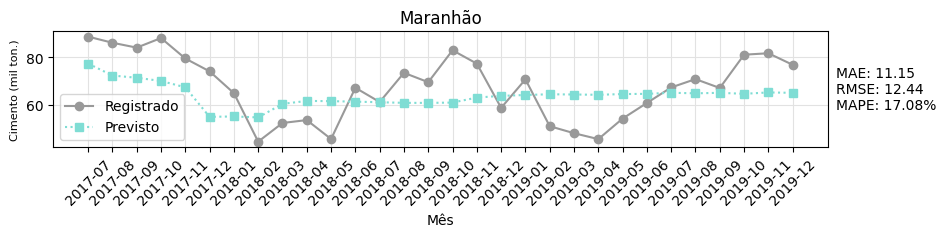

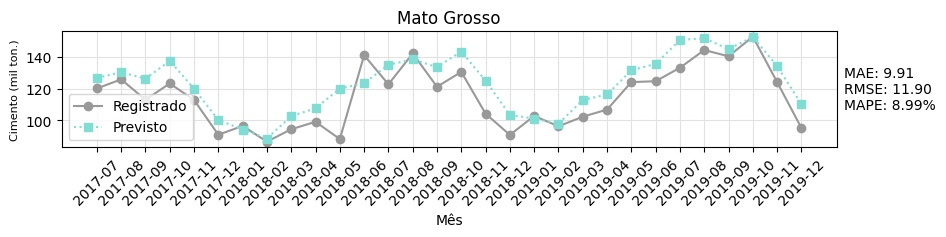

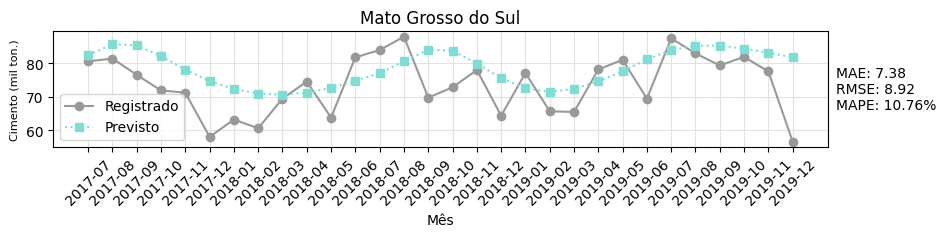

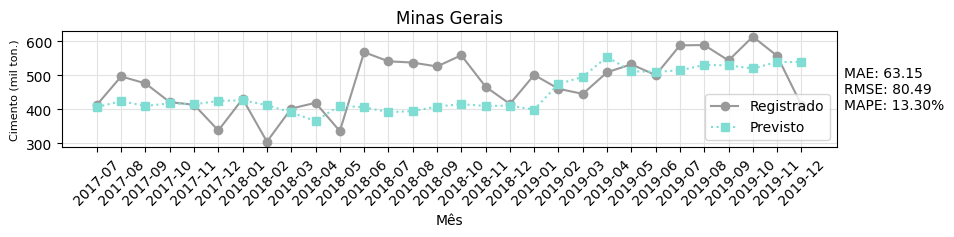

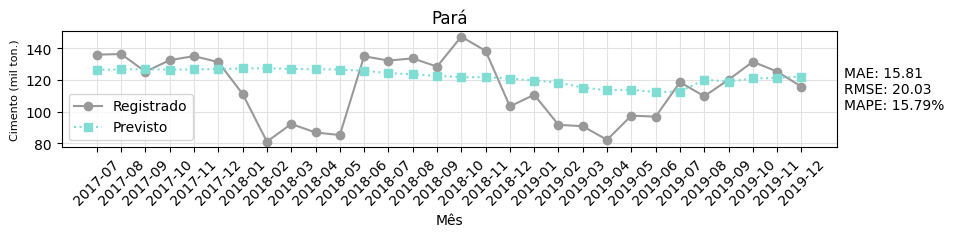

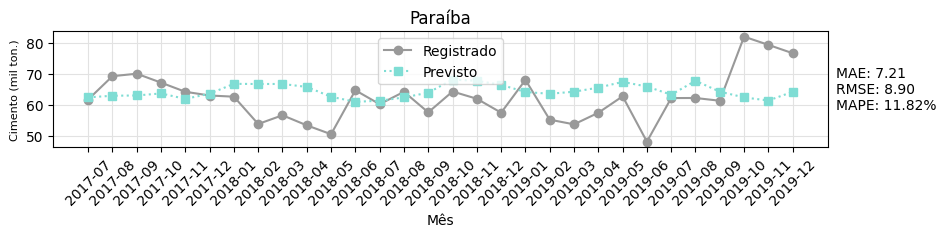

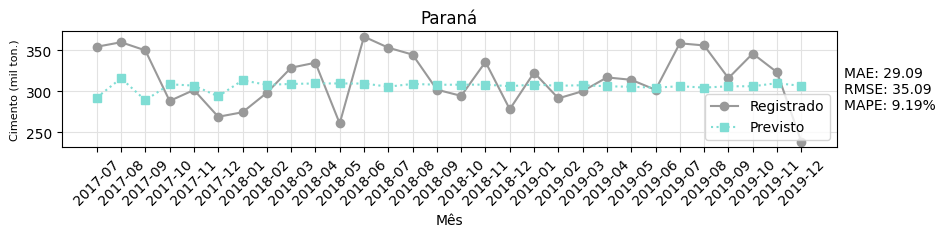

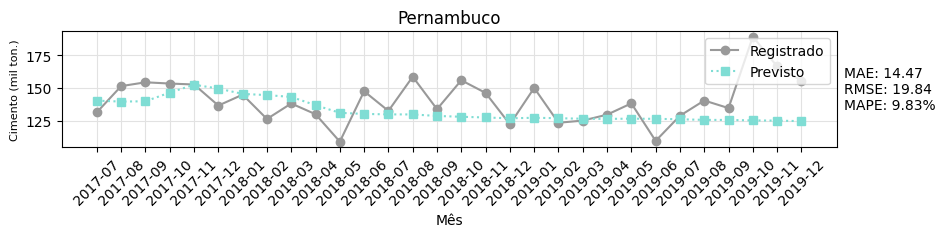

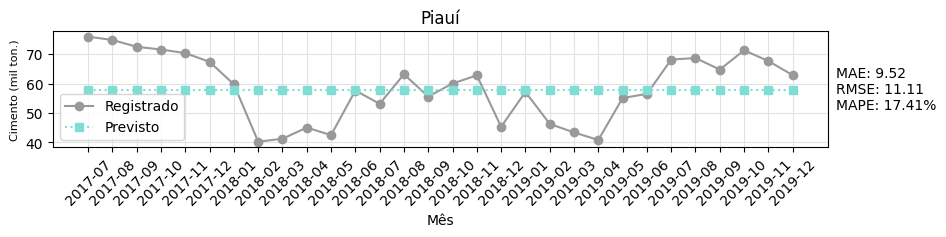

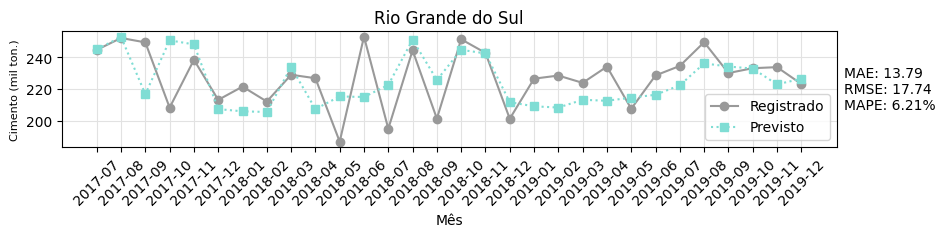

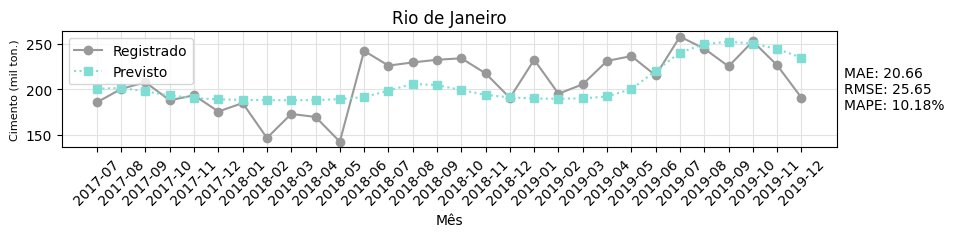

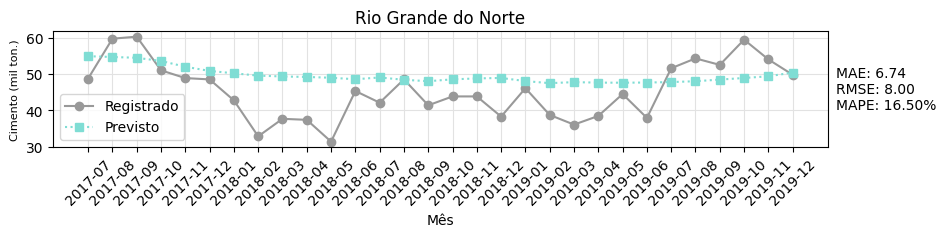

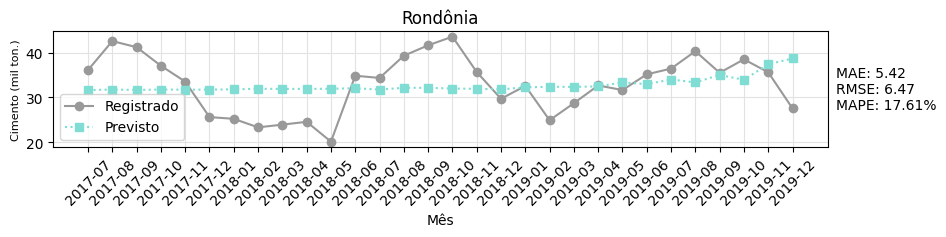

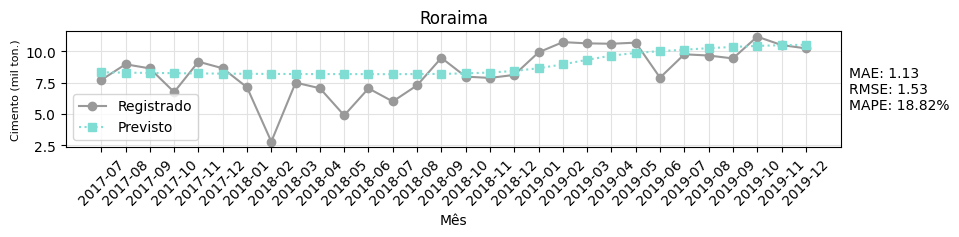

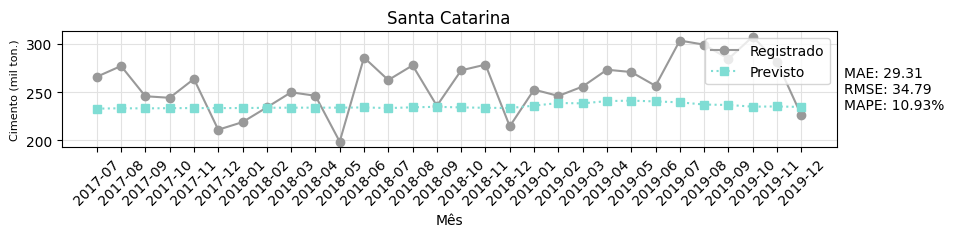

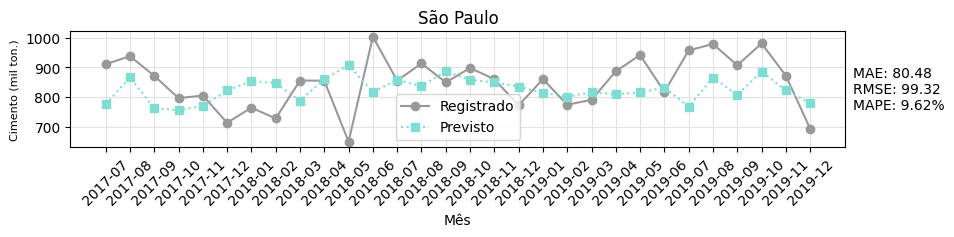

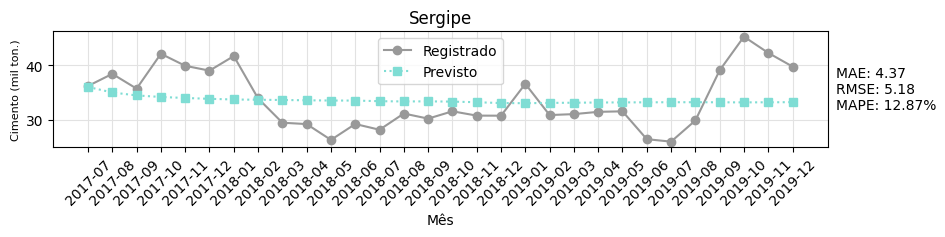

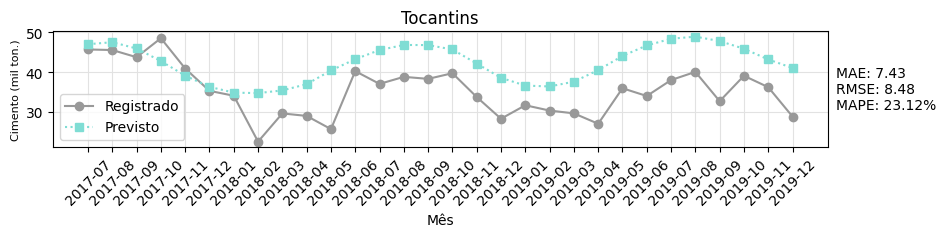

In [62]:
def plot_time_series(df_registered, df_previsto):
    states = df_registered.columns  

    for state in states:
        plt.figure(figsize=(10, 1.5))
        plt.plot(df_registered.index, df_registered[state], 
                 label='Registrado', marker='o', color='#999999') 
        plt.plot(df_previsto.index, df_previsto[state], 
                 label='Previsto', marker='s', linestyle='dotted', color='#7FDDD4') 

        actual = df_registered[state]
        predicted = df_previsto[state]

        mae = mean_absolute_error(actual, predicted)
        rmse = mean_squared_error(actual, predicted, squared=False)
        mape = (100 / len(actual)) * sum(abs((actual - predicted) / actual))

        info_text = f'MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%' 

        plt.text(1.01, 0.5, info_text, transform=plt.gca().transAxes, 
                 fontsize=10, verticalalignment='center')

        plt.xlabel('Mês', fontsize=10) 
        plt.xticks(rotation=45)
        plt.ylabel('Cimento (mil ton.)', fontsize=8) 
        plt.title(f'{state}')
        plt.legend()
        plt.grid(True, color='#E2E2E2') 
        plt.show()


plot_time_series(df_registered, df_previsto)

In [63]:
def plot_error_distribution(df_registered, df_previsto):
    errors = ((df_registered - df_previsto) / df_registered) * 100
    all_errors = errors.values.flatten()
    ranges = [float('-inf'), -50, -30, -10, 10, 30, 50, float('inf')]
    error_counts = pd.cut(all_errors, ranges).value_counts().sort_index()
    labels = ['< -50%', '-50% to -30%', '-30% to -10%', '-10% to 10%', '10% to 30%', '30% to 50%', '> 50%']

    plt.figure(figsize=(8, 6))
    bars = plt.barh(labels, error_counts, color='#7FDDD4')
    plt.xlabel('Número de previsões')
    plt.ylabel('Intervalo de erros')
    plt.title('Distribuição agregada de erros')
    plt.gca().spines['top'].set_visible(False)  
    plt.gca().spines['right'].set_visible(False)

    for bar, count in zip(bars, error_counts):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{(count / sum(error_counts)) * 100:.1f}%", 
                 va='center', ha='left', fontsize=10, color='black')

    plt.show()

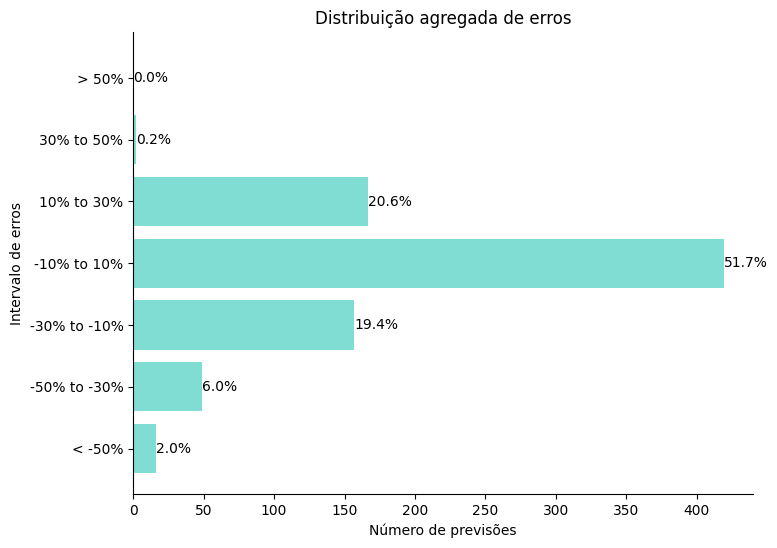

In [61]:
plot_error_distribution(df_registered, df_previsto)

In [42]:
def calculate_errors_summary(df_registered, df_previsto):
    errors = ((df_registered - df_previsto) / df_registered) * 100
    
    rmse_values = []
    mae_values = []
    mape_values = []

    for column in df_registered.columns:
        actual = df_registered[column]
        predicted = df_previsto[column]

        rmse = mean_squared_error(actual, predicted, squared=False)
        mae = mean_absolute_error(actual, predicted)
        mape = (100 / len(actual)) * sum(abs((actual - predicted) / actual))

        rmse_values.append(round(rmse,2))
        mae_values.append(round(mae,2))
        mape_values.append(round(mape,2))

    summary = {
        'RMSE': rmse_values,
        'MAE': mae_values,
        'MAPE': mape_values
    }

    summary_df = pd.DataFrame(summary, index=df_registered.columns)
    mean_row = {
        'RMSE': round(sum(rmse_values) / len(rmse_values), 2),
        'MAE': round(sum(mae_values) / len(mae_values), 2),
        'MAPE': round(sum(mape_values) / len(mape_values), 2)
    }
    summary_df.loc['Mean'] = mean_row  

    return summary_df

In [32]:
sumario_erro = calculate_errors_summary(df_registered, df_previsto)
sumario_erro

,RMSE,MAE,MAPE
Registrado (mil ton.),,,
Acre,2.54,2.22,17.58
Alagoas,3.53,2.68,9.29
Amapá,1.71,1.33,14.84
Amazonas,13.46,10.26,35.04
Bahia,28.49,21.54,8.74
Ceara,21.26,16.63,12.65
Distrito Federal,6.25,5.12,10.21
Espirito Santo,11.80,8.18,9.41
Goiais,23.23,18.41,9.64
